In [ ]:
from ipywidgets import interactive, IntSlider, FloatSlider
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import bitlib as bit

plt.xkcd()  # Yes...

## Tangents

Consider a smooth curve and a point $A$ on this curve. The __tangent__ to this curve at point $A$ is the straight line that _touches but does not cross_ the curve at $A$. But note that the straight line is allowed to cross the curve anywhere else. As we will see later, many problems in differential calculus reduces to finding the slope of a tangent.

Note that the equation of a tangent is a linear function $t(x)=ax+b$, where $a$ is the slope of the tangent (a straight line) and $b$ is its $y$-intercept.

### Exercise
---
1. Consider the unit circle. Point $A$ is on this circle at radius $30^\circ$. Determine the equation of the tangent to the circle at $A$.

2. Consider the graph of the function $f(x)=\sqrt{x}$. Point $A(2\vert \sqrt{2})$ is on the graph. Determine, as _precise as possible_, the slope of the tangent to the graph at $A$.


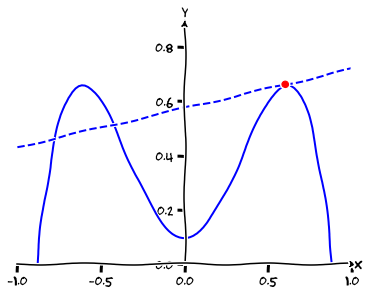

In [50]:
plt.rcParams["figure.figsize"] = (6, 4.5)
fig, ax = plt.subplots(1, 1) #ax is 2x2 matrix

def pow(x):
    return -4*np.power(x,4)+3*np.power(x,2)+0.1

def powPrime(x):
    return -16*np.power(x,3)+6*np.power(x,1)


def g(ax):
    #plot graph
    x = np.linspace(-1,1, num = 100)
    ax.plot(x, pow(x), 'blue')
    ax.set_ylim((0,0.9))
    ax.set_xlim((-1,1)) 
    bit.formatAxes(ax)
    bit.formatAxes(ax)
    #plot tangent
    al = powPrime(0.6)
    b = pow(0.6)-al*0.6
    x = np.linspace(-1,1, num = 2)
    ax.plot(x,al*x+b,'b', linestyle="--")
    
    ax.plot(0.6,pow(0.6), 'ro')
    
g(ax)

### Solution
---
1. The equation of the tangent has the general form $t(x)=ax+b$, where $a$ is the slope of the tangent, and $b$ is its $y$-intercept. We have 

  $$a=\frac{\Delta y}{\Delta x}=\frac{O}{-A}=\tan(60^\circ)=-1.7320...$$
  
  To find $b$, note that because of $H=1$ it is $\sin(30^\circ)=\frac{O}{H}=O$ and $\cos(30^\circ)=\frac{A}{H}=A$. It follows that the $x$ and $y$ coordinate of point $A$ is $x=O=\sin(30^\circ)=0.8660...$ and $y=O=\cos(30^\circ)=0.5$, thus $A(0.8660...\vert 0.5)$. Because the point $A$ is on the tangent, it is
  
  $$f(0.8660...)=0.5 \rightarrow  -1.7320...\cdot 0.8660...+b = 0.5 \rightarrow b=2$$
  
  Thus, we have $t(x)=-1.7320... \cdot x +2$.
  
2. You can give a an estimate of the slope of the tangent by determining the slope of the straight line that passes through the points $A$ and $B$ on the graph (a so called _secant_ of the graph). The closer $B$ is to $A$, the more parallel are the secant and the tangent, and the better is the estimate of the slope of the tangent. 

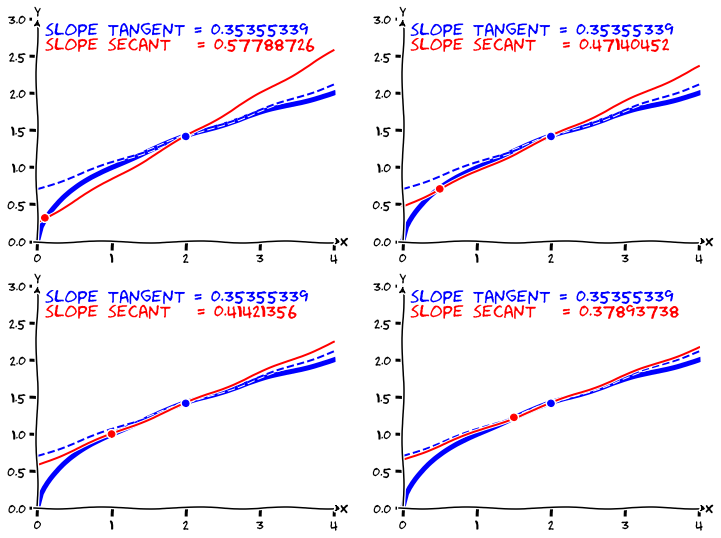

In [49]:
plt.rcParams["figure.figsize"] = (12, 9)
fig, ax = plt.subplots(2, 2) #ax is 2x2 matrix

def f(x2, ax):
    x1=2
    A=[x1,np.sqrt(x1)]
    B=[x2,np.sqrt(x2)]
    
    al_sec = (B[1]-A[1])/(B[0]-A[0])
    b_sec = A[1]-al_sec*A[0]
    al_tan = 0.5*1/np.sqrt(x1)
    b_tan = A[1]-al_tan*A[0]
                                 
    x_f = np.linspace(0,4, num=100)
    x_sec = np.linspace(0,4, num=2)
    x_tan = np.linspace(0,4, num=2)

    ax.axis('equal')
    ax.set_ylim((0,3))
    ax.set_xlim((0,4)) 
    bit.formatAxes(ax)
    
    #plot root function
    ax.plot(x_f,np.sqrt(x_f),'blue', linewidth=5)
    
    #plot tangent
    ax.plot(x_tan,al_tan*x_tan+b_tan,'blue', linestyle="--")
    
    #plot secant          
    ax.plot(x_sec,al_sec*x_sec+b_sec,'red')
    
    
    #plot points
    ax.plot(A[0],A[1],'bo')
    ax.plot(B[0],B[1],'ro')
    
    ax.text(0.1,2.6,f'slope secant   = {str(round(al_sec,8))}', color='red', size = 18)
    ax.text(0.1,2.8,f'slope tangent = {str(round(al_tan,8))}', color='blue', size = 18)
    

#widget = interactive(f, x2=FloatSlider(min=0, max=1.99, step=0.05, continuous_update=False))
#display(widget)
f(0.1,ax[0,0])
f(0.5,ax[0,1])
f(1.0,ax[1,0])
f(1.5,ax[1,1])


In [51]:
#needs to be in the last cell for css styling
from IPython.core.display import HTML
def css_styling():
    styles = open("../../assets/custom/custom.css", "r").read()
    return HTML(styles)
css_styling()